<img src="../slike/linreg_1.jpg" width=600/>

# Nadzorovano učenje

# Supervised learning


Scenarij pri metodah *nadzorovanega modeliranja* je pogosto naslednji. Podatki so predstavljeni s pari

$$ {(\vec{x}_1, y_1), (\vec{x}_2, y_2), ... (\vec{x}_n, y_n)} $$

kjer $\vec{x}_i$ imenujemo *neodvisne*, $y_i$ pa *odvisne* spremenljivke.  Zanima nas *preslikava* $h(\vec{x})$, ki vrednosti neodvisne spremenljivke slika v odvisne, z napako $\epsilon_i$. Torej,

$$ y_i = h(\vec{x_i}) + \epsilon_i $$

Spremenljivke $\vec{x}_i$, $y$ so v splošnem lahko zvezne, diskretne in druge. Preslikava $h(\vec{x})$ predstavlja *model* podatkov. Preslikava je lahko poljubna matematična funkcija (ali tudi algoritem, program), ki je odvisna od enega ali več *parametrov*. 

Strojno učenje pogosto pojmujemo kot iskanje parametrov (ali kar funkcije same) tako, da bo napaka $\epsilon_i$ karseda majhna. 

The scenario for *controlled modeling* methods is often the following. The data is presented with couples

$$ {(\vec{x}_1, y_1), (\vec{x}_2, y_2), ... (\vec{x}_n, y_n)} $$

where $\vec{x}_i$ is called *independent*, and $y_i$ *dependent* variables. We are interested in the *mapping* $h(\vec{x})$, which maps the values of the independent variable to the dependent, with the error $\epsilon_i$. So,

$$ y_i = h(\vec{x_i}) + \epsilon_i $$

The variables $\vec{x}_i$, $y$ can generally be continuous, discrete and others. The $h(\vec{x})$ mapping represents the *model* of the data. The mapping can be any arbitrary mathematical function (or also an algorithm, a program) that depends on one or more *parameters*.

Machine learning is often regarded as a search for parameters (or of the function itself) so that the error $\epsilon_i$ is as small as possible.

<img src="../slike/linreg_2.png" width=600/>

## Linearna regresija

Linearna regresija je primer enostavnega modela, kjer predpostavljamo:
* tako odvisne kot neodvisne spremenljivke so realna števila
* odvisna spremljivka je linearna kombinacija neodvisnih 
* napaka $\epsilon$ je normalno porazdeljena z upanjem $\mu_{\epsilon}=0$ in neznano varianco

Odvisne spremenljivke so v splošnem vektorji v $p$-dimenzionalnem prostoru realnih števil, $\vec{x} = (x_1, x_2, ... x_p)$.

**Model** je oblike

$$ h(\vec{x}) = \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \beta_0$$

kjer vektor $\vec{\beta} = (\beta_0, \beta_1, ... \beta_p)$ predstavlja neznane parametre oz. koeficiente. Model je torej premica (pri $p=1$) oz. ravnina v $p$-dimenzionalnem prostoru. 


Učenje predstavlja iskanje (optimizacijo) parametrov $\vec{\beta}$ s ciljem zmanjšanja povprečne napake v podatkih.

$$ \text{min}_{\beta} \frac{1}{n} \sum_1^{n} (y_i - h(\vec{x}_i))^2 = \frac{1}{n} \sum_1^{n} \epsilon^2 $$

Vrednost zgornjega izraza se imenuje **srednja kvadratična napaka** (ang *mean squared error* ali MSE). Iz statističnega vidika pa predstavlja **nepojasnjeno varianco**.

Algoritmov za minimizacijo zgornjega izraza tokrat ne bomo izpeljevali, temveč se raje osredotočimo na praktično uporabo. Več napotkov je na voljo <a href="http://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf">tukaj</a>. 

## Linear regression

Linear regression is an example of a simple model where we assume:
* both dependent as independent variables are real numbers
* the dependent variable is a linear combination of independent ones
* The $\epsilon$ error is normally distributed with the hope of $\mu_{\epsilon}=0$ and unknown variance

The dependent variables are in general vectors in the $p$-dimensional space of real numbers, $\vec{x} = (x_1, x_2, ... x_p)$.

**The model** is of form

$$ h(\vec{x}) = \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \beta_0$$

where the vector $\vec{\beta} = (\beta_0, \beta_1, ... \beta_p)$ represents unknown parameters or coefficients. The model is therefore a line (for $p=1$) or a plane in $p$-dimensional space.

Learning is the search (optimization) of parameters $\vec{\beta}$ with the aim of reducing the average error in the data.

$$ \text{min}_{\beta} \frac{1}{n} \sum_1^{n} (y_i - h(\vec{x}_i))^2 = \frac{1}{n} \sum_1^{n} \epsilon^2 $$

The value of the above term is called **the mean square error** (or MSE). From a statistical point of view it represents the **unexplained variance**.

At this time, we will not derive algorithms for minimizing the above expression, but rather focus on practical use. More information is available <a href="http://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf">here</a>.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

Začnimo s preprostim primerom z eno neodvisno spremenljivko $x$ ter odvisno spremenljivko $y$. 

Let's start with a simple example with one independent variable $x$ and a dependent variable $y$.

(101, 1)
(101, 1)


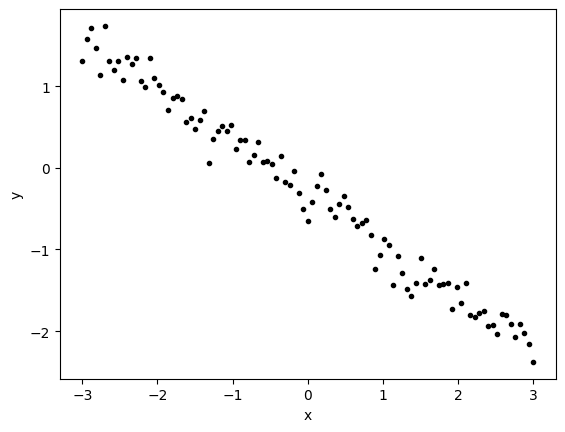

In [2]:
data = np.loadtxt("../data/sintetični/data_A.txt")
x    = data[:, [0]]
y    = -data[:, [1]]

print(x.shape)
print(y.shape)

plt.figure()
plt.plot(x, y, "k.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Podatki kar dobro spominjajo na premico. 

The data strongly resembles a line.

Poizkusimo poiskati linearni model, ki bo zmanjšal srednjo kvadratično napako.

Na levi sliki prikazujemo **vrednosti modela** za vse vrednosti $x$ na danem intervalu.

Desna slika pa prikazuje vrednost <i>ostankov</i> $y_i - h(\vec{x}_i)$ .  Bolje, kot se model prilega podatkom, manj povezana bosta odvisna spremenljivka in ostanek.

Let's try to find a linear model that will reduce the mean square error.

In the left image, we display the **values of the model** for all values $x$ on a given interval.

The right picture shows the value of *remainders* $y_i - h(\vec{x}_i)$. The better the model fits the data, the less connected the dependent variable and the remainder will be.

In [3]:
from scipy.stats import pearsonr
def plot_fit_residual(x, y, yp):
    _, axes  = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    axes[0].plot(x.ravel(), y.ravel(), "k.",  label="Podatki")
    axes[0].plot(x.ravel(), yp.ravel(), "r-", label="Model h(x)")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].legend()

    r = pearsonr(y.ravel(), y.ravel()-yp.ravel())[0]
    axes[1].plot(y.ravel(), y.ravel()-yp.ravel(), "k.", label="Ostanek")
    axes[1].set_xlabel("y")
    axes[1].set_ylabel("y-h(x)")
    axes[1].set_title("Graf ostankov, R=%.3f" % r)
    axes[1].legend()
    plt.show()

y = -0.311 + -0.637 x


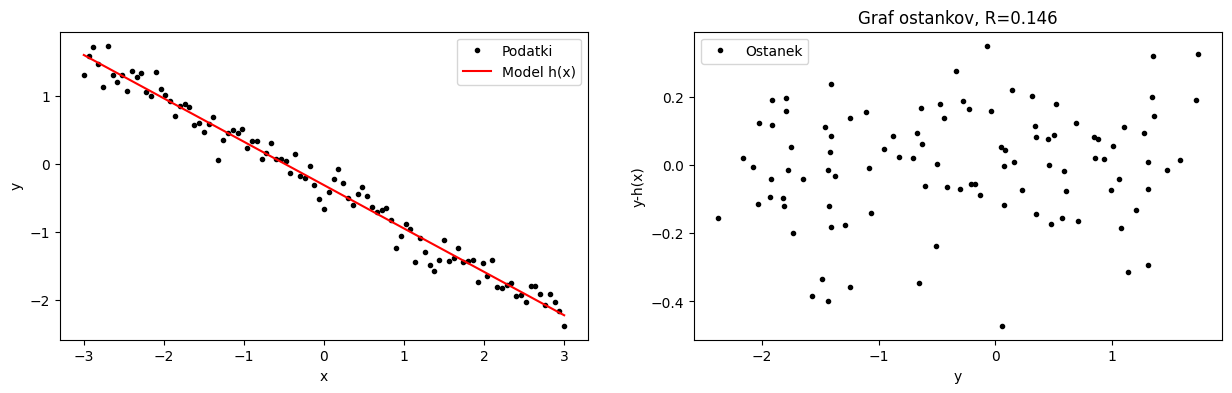

In [4]:
model = LinearRegression()
model.fit(x, y)

coef = model.coef_[0, 0]
intercept = model.intercept_[0]
print("y = %.3f + %.3f x" % (intercept, coef))

hx = model.predict(x)

plot_fit_residual(x, y, hx)

Izmerimo srednjo kvadratično napako...

Let's measure the mean square error ...

In [5]:
mean_squared_error(hx, y)

0.027007427173743746

... ki je enaka varianci razlike. 

... which is equal to the variance of difference.

In [6]:
diff_var = np.var(hx-y)
diff_var

0.027007427173743746

Tako lahko dobimo *delež pojasnene variance* ($R^2$). Delež v odstotkih si lažje intutivno razlagamo.

So we can get the *proportion of the explained variance* ($R^2$). The proportion in percent is easier to interpret intuitively.

In [7]:
total_variance = np.var(y)
R2 = (1 - diff_var / total_variance) * 100
print("Explained variance: %.2f" % R2 + "%" )

r2 = r2_score(y, hx)*100
print("R²: %.2f" % r2 + "%" )

Explained variance: 97.87%
R²: 97.87%


<img src="../slike/linreg_3.png" width=400/>

## Polinomska regresija

## Polynomial regression

Oglejmo si naslednji motivacijski primer.

Let's look at the next motivational example.

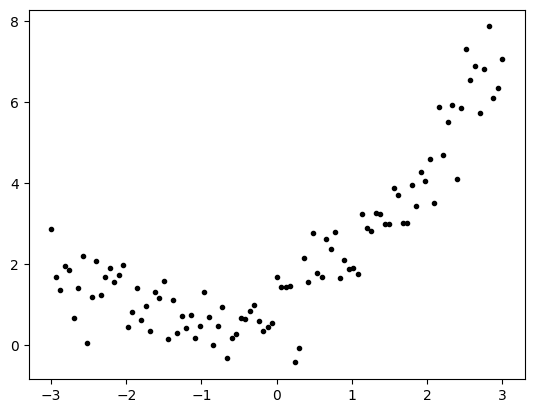

In [8]:
data = np.loadtxt("../data/sintetični/data_B.txt")
x    = data[:, [0]]
y    = data[:, [1]]

plt.figure()
plt.plot(x, y, "k.")
plt.show()

Že na prvi pogled je jasno, da model premice ne bo zadostoval.  Če skozi podatke potegnemo premico, vidimo, da na nekaterih mesti pošteno zgreši podatke. To vidimo tudi na grafu ostankov, saj je napaka očitno odvisna od velikosti $y$, česar si ne želimo.

Already at first glance it is clear that the line model will not be enough. If we pull the line through the data, we see that in some places, the data is erroneous. This is also seen on the residual graph, since the error obviously depends on the size of $y$, which we do not want.

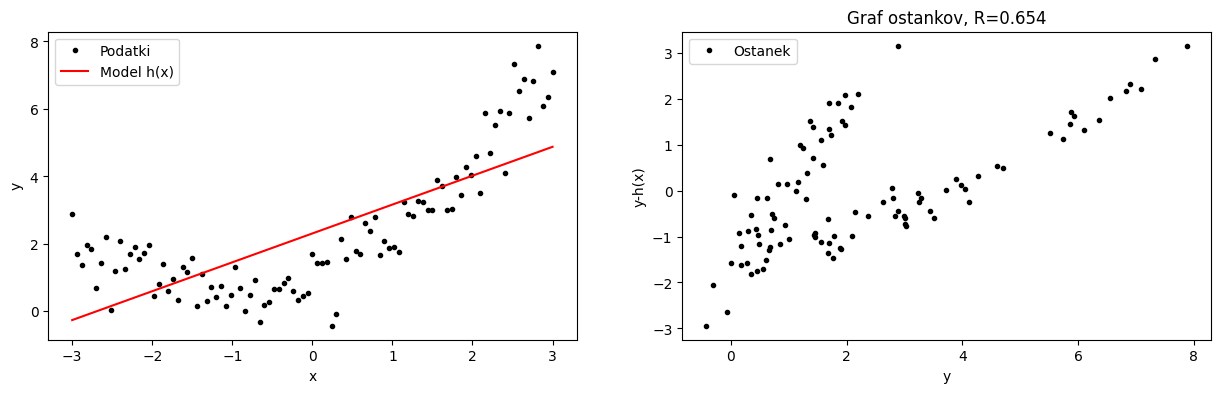

In [9]:
model = LinearRegression()
model.fit(x, y)
hx = model.predict(x)

plot_fit_residual(x, y, hx)

In [10]:
r2 = r2_score(y, hx)*100
print("R²: %.2f" % r2 + "%" )

R²: 57.23%


## Model polinomske regresije

Z pomočjo linearnih modelov lahko modeliramo tudi nelinearne odvisnoti, kar je glede na začetne predpostavke nekoliko preseneneljivo. Vrednost $x$ je v tem primeru enodimenzionalna spremenljivka (p=1).

**Model polinomske regresije** v eni dimenziji je polinom stopnje $D$:

$$ h(\vec{x}) = \beta_1 x + \beta_2 x^2 + ... + \beta_D x^D + \beta_0$$

Učinek dosežemo z ustrezno priredbo prostora. Spremenljivko $x$ preslikamo v vektor tako, da izračunamo ustrezne potence:

$$x \rightarrow (x, x^2, x^3, ... x^D) = \vec{x}$$

V tako sestavljenem prostoru ni polinom nič drugega kot linearna preslikava! 

## Polynomial regression model

Linear models can also model non-linear dependencies, which is somewhat surprising given the initial assumptions. The $x$ value in this case is a one-dimensional variable (p=1).

**Polynomial regression model** in one dimension is a polynomial of degree $D$:

$$ h(\vec{x}) = \beta_1 x + \beta_2 x^2 + ... + \beta_D x^D + \beta_0$$

The effect is achieved by appropriately arranging the space. The variable $x$ is mapped into a vector by calculating the corresponding potencies:

$$x \rightarrow (x, x^2, x^3, ... x^D) = \vec{x}$$

In such an assembly, there is nothing more than a linear mapping!

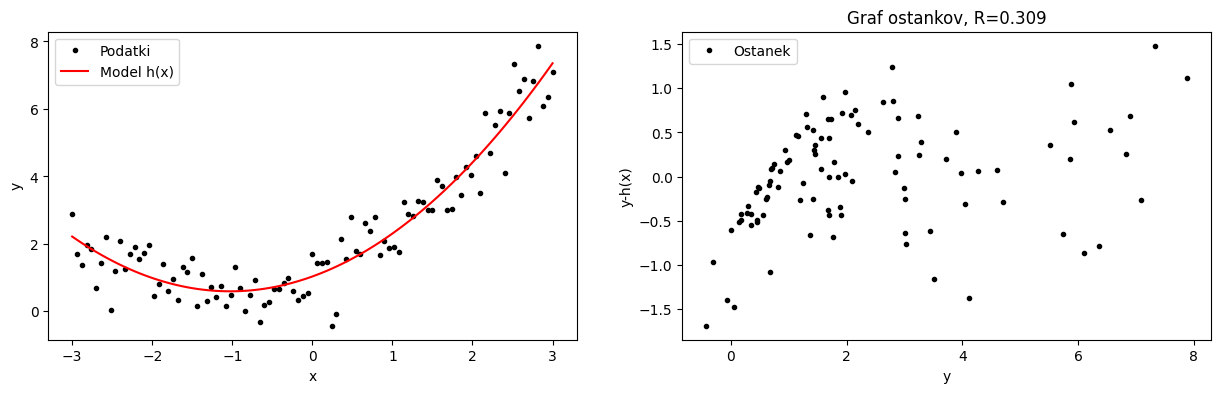

In [11]:
X = np.zeros((len(x), 2))
X[:, 0] = x.ravel()
X[:, 1] = x.ravel()**2       

model = LinearRegression()
model.fit(X, y)

hx = model.predict(X)

plot_fit_residual(x, y, hx)

##### Vprašanje 6-1-1
Primerjaj $R^2$ oceno linearnega in polinomskega modela.

##### Question 6-1-1
Compare the $R^2$ score of the linear and polynomial model.

[Odgovor](206-1.ipynb#Odgovor-6-1-1)

[Answer](206-1.ipynb#Answer-6-1-1)

<img src="../slike/linreg_4.png" width=600/>

## Pretirano prileganje

Optimalnega modela seveda pogosto ne poznamo. Uporaba pretirano kompleksnih modelov (kompleksnost si lahko predstavljamo kot velikost družine funkcij), lahko vodi v <b>pretirano prileganje</b> (ang. <i>overfitting</i>).

Oglejmo si primer polinoma stopnje 20:

## Overfitting

Of course, we often do not know the optimal model. The use of excessively complex models (complexity can be represented as the size of a family of functions) can lead to **overfitting**.

Let's look at the example of a 20 degree polynomial:

In [12]:
def plot_coefficients(coef):
    coef=coef.ravel()
    D = len(coef)
    plt.title("Parametri modela")
    plt.bar(np.arange(D), coef)
    plt.xticks(np.arange(D))
    plt.ylabel("beta")
    plt.xlabel("d")
    plt.show()

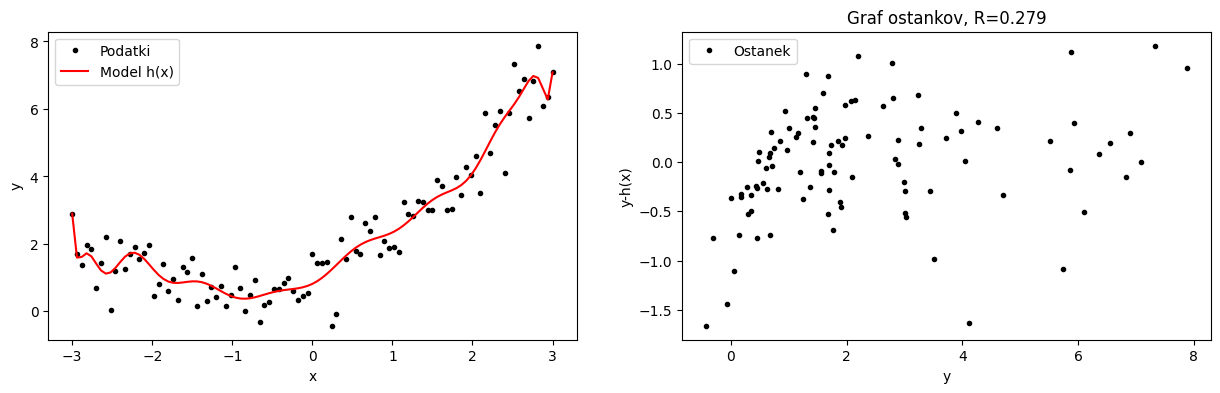

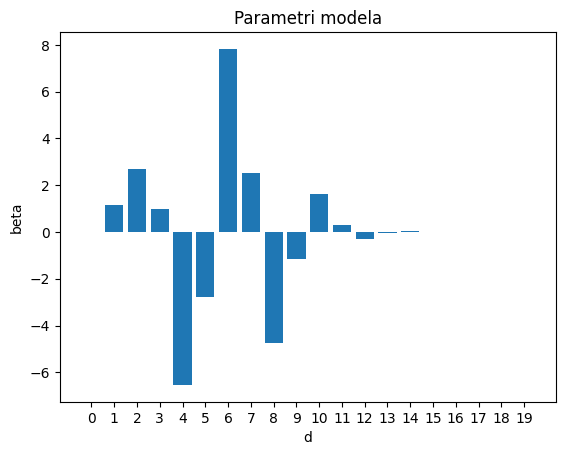

In [13]:
D = 20
X = np.zeros((len(x), D))
for d in range(0, D):
    X[:, d] = x.ravel()**d
    
model = LinearRegression()
model.fit(X, y)

hx = model.predict(X)

plot_fit_residual(X[:, 1], y, hx)
plot_coefficients(model.coef_)

Model se na videz odlično prilega podatkom. Tudi graf ostankov kaže spodbudno sliko. Težava pretiranega prileganja se pojavi pri **napovedovanju novih podatkov**.

The model seems to fit the data perfectly. The graph of the remains also shows a stimulating picture. The problem of over-fitting occurs when **predicting new data**.

##### Vprašanje 6-1-2
Izmeri pojasnjeno varianco polinomskega modela.

##### Question 6-1-2
Measure the explained variance of the polynomial model.

[Odgovor](206-1.ipynb#Odgovor-6-1-2)

[Answer](206-1.ipynb#Answer-6-1-2)

## Rešitev: kaznovanje pretirano kompleksnih modelov 

## Solution: punishing excessively complex models



Poleg minimizacije srednje kvadratične napake lahko pri iskanju rešitve tudi *kaznujemo kompleksnost modelov*. Želimo torej, da so najdeni parametri v geometrijskem smislu čim manjši. Ta postopek je znan tudi kot regularizacija. Stopnjo regularizacije nadzoruje parameter $\alpha$, ki ga določimo kot uporabniki. Dve najpogostejši različici modelov sta:

### Regresija Lasso

*"Kaznovanje manhattanske razdalje vektorja $\vec{\beta}$ od izhodišča"*

$$ \text{min}_{\beta} \sum_1^{n} (y_i - h(\vec{x}_i))^2 + \alpha \|\vec{\beta}\|_1 $$

<font color="green">Prednost</font>: vrača **redke** vektorje parametrov $\vec{\beta}$. Večina komponent $\beta_j$ bo enaka 0 - <font color="green">ZELO ZAŽELENO</font>!

<font color="red">Slabost</font>: zahtevno načrtovanje algoritmov za optimizacijo


### Regresija Ridge
*"Kaznovanje evklidske razdalje vektorja $\vec{\beta}$ od izhodišča"*
$$ \text{min}_{\beta} \sum_1^{n} (y_i - h(\vec{x}_i))^2  + \alpha \|\vec{\beta}\|_2 $$

<font color="green">Prednost</font>: Enostaven izračun

<font color="red">Slabost</font>: V splošnem ne vrača redkih vrednosti parametrov.

In addition to minimizing the mean square error, we can also penalize the *complexity of the models* when looking for a solution. Therefore, we want the parameters found in the geometric sense to be as small as possible. This procedure is also known as regularization. The degree of regularization is monitored by the parameter $\alpha$, which is defined by the users. The two most common models are:

### Lasso Regression

*"Punishment of the Manhattan distance of the vector $\vec{\beta}$ from the baseline"*

$$ \text{min}_{\beta} \sum_1^{n} (y_i - h(\vec{x}_i))^2 + \alpha \|\vec{\beta}\|_1 $$

<font color="green">Pro</font>: returns **sparse** parameter vectors $\vec{\beta}$. Most of the components $\beta_j$ will be 0 - <font color="green">VERY DESIRABLE</font>!

<font color="red">Con</font>: complex planning of optimization algorithms


### Ridge Regression
*"Penalizing the eclidic distance of the vector $\vec{\beta}$ from the starting point"*
$$ \text{min}_{\beta} \sum_1^{n} (y_i - h(\vec{x}_i))^2  + \alpha \|\vec{\beta}\|_2 $$

<font color="green">Pro</font>: Easy calculation

<font color="red">Con</font>: Generally does not return rare parameter values.

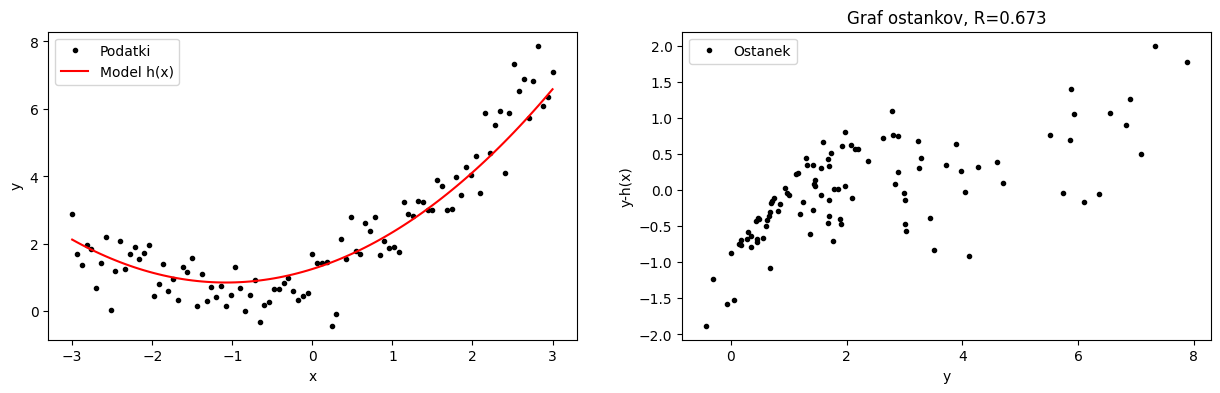

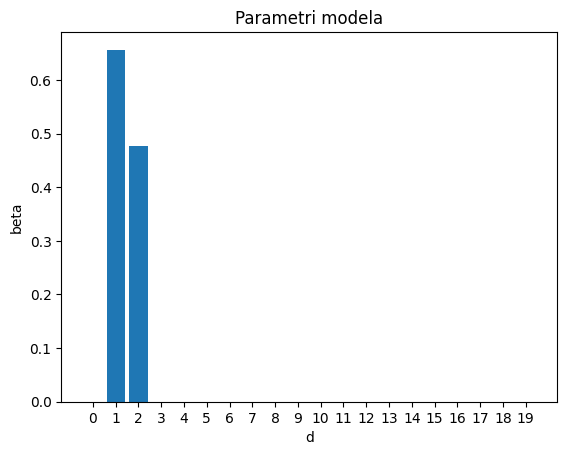

array([0.        , 0.65652151, 0.47634146, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [14]:
D = 20 

X = np.zeros((len(x), D))
for d in range(0, D):
    X[:, d] = x.ravel()**d
    
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

model = Lasso(alpha=0.1)
model.fit(X, y)

hx = model.predict(X)

X = scaler_x.inverse_transform(X)
y = scaler_y.inverse_transform(y)
hx = scaler_y.inverse_transform(hx.reshape(-1, 1))
plot_fit_residual(X[:, 1], y, hx)
plot_coefficients(model.coef_)
model.coef_

##### Vprašanje 6-1-3
Poizkusi podatke modelirati z regresijo ```Ridge```. Kakšen je vpliv parametra ```alpha``` na a) kvaliteto prileganja b) koeficiente modela?

##### Question 6-1-3

Try to model the data using regression ```Ridge```. What is the effect of the parameter ```alpha``` on a) the fitting quality, b) model coefficients?

[Odgovor](206-1.ipynb#Odgovor-6-1-3)

[Answer](206-1.ipynb#Answer-6-1-3)

Funkcija izgleda "ravno pravi" model za podatke. Na grafu koeficientov (parametrov) vidimo, da so večino teže dobili koeficienti nižjih stopenj polinoma, kar predstavlja manj kompleksen model.

The function looks like "just the right" model fpr the data. On the graph of the coefficients (parameters) we see that the coefficients of lower levels of the polynomial are most of the weight, which is a less complex model.

##### Vprašanje 6-1-4
Poišči modele polinomske regresije za spodnje tri nabore podatkov. Izberi stopnjo polinoma ter morda vrsto regularizacijskega modela. Nariši graf funkcije in diagram ostankov. Komentiraj rezultate.

Pravilne rešitve (koeficiente in stopnjo polinomov najdeš v ```../data/sintetični/coefficients_*.txt```

##### Question 6-1-4
Find polynomial regression models for the following three sets of data. Choose the degree of the polynom and perhaps the type of the regularization model. Draw graph function and residue diagram. Comment the results.

Correct solutions (you find the coefficients and degree of polynomials in ```../data/sintetični/coefficients_*.txt```

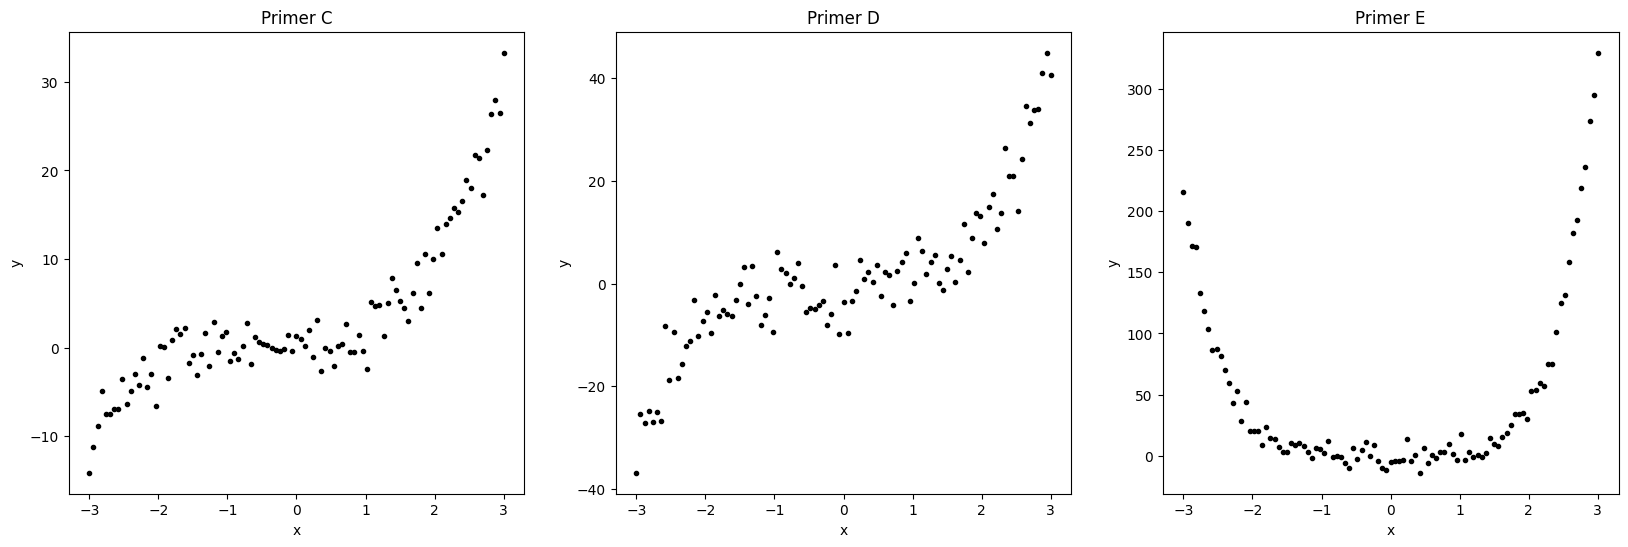

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for example, ax in zip(["C", "D", "E"], axes):
    data = np.loadtxt("../data/sintetični/data_%s.txt" % example)
    x    = data[:, [0]]
    y    = data[:, [1]]
    
    ax.plot(x, y, "k.")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Primer %s" % example)

[Odgovor](206-1.ipynb#Odgovor-6-1-4)

[Answer](206-1.ipynb#Answer-6-1-4)

<img src="../slike/linreg_5.png" width=400/>

## Uporaba v praksi: analiza sentimenta

## Use in practice: sentiment analysis

Za konec si oglejmo povsem praktičen primer uporabe regresijskih modelov. Iz HuggingFace bomo naložili podatkovno zbirko `yelp_review_full`, ki vsebuje 650.000 recenzij raznih podjetij, skupaj z ocenami od 1 do 5 zvezdic. Na podlagi besedila recenzij bomo poskusili napovedati oceno z uporabo linearne regresije. 

Primer <font color="green">pozitivne</font> recenzije (ocena = 5).

To conclude, let’s look at a completely practical example of applying regression models. We’ll load the `yelp_review_full` dataset from HuggingFace, which contains 650,000 reviews of various businesses, each rated from 1 to 5 stars. Based on the review text, we’ll try to predict the rating using linear regression.

An example of a <font color="green">positive</font> review (rating = 5).

> Top notch doctor in a top notch practice. Can't say I am surprised when I was referred to him by another doctor who I think is wonderful and because he went to one of the best medical schools in the country. \nIt is really easy to get an appointment. There is minimal wait to be seen and his bedside manner is great.


Primer <font color="red">negativne</font>  recenzije (ocena = 1).

An example of a <font color="red">negative</font> review (rating = 1).

> I don't know what Dr. Goldberg was like before  moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you call the office, they'll put you through to a voice mail, that NO ONE ever answers or returns your call. Both my adult children and husband have decided to leave this practice after experiencing such frustration. The entire office has an attitude like they are doing you a favor. Give me a break! Stay away from this doc and the practice. You deserve better and they will not be there when you really need them. I have never felt compelled to write a bad review about anyone until I met this pathetic excuse for a doctor who is all about the money.

In [16]:
from datasets import load_dataset
ds = load_dataset("yelp_review_full")
df = ds["train"].to_pandas()
df["rating"] = df["label"] + 1
df = df[["text", "rating"]]
df.head()

,text,rating
0,dr. goldberg offers everything i look for in a...,5
1,"Unfortunately, the frustration of being Dr. Go...",2
2,Been going to Dr. Goldberg for over 10 years. ...,4
3,Got a letter in the mail last week that said D...,4
4,I don't know what Dr. Goldberg was like before...,1


Naključno vzorčimo 2.000 recenzij.

We randomly sample 2,000 reviews.

In [17]:
import pickle

df = df.sample(2000, random_state=42).reset_index(drop=True)
with open("../data/yelp_2000.pkl", "wb") as f:
    pickle.dump(df, f)

Vsako recenzijo predstavimo v prostoru 5.000 najpogostejših besed oz. parov besed v podatkovni zbirki (predstavitev bag-of-words). Vsaka komponenta vrstice $x$ (vektorja) šteje, kolikorat se beseda/par besed pojavi v določeni recenziji.

We present each review in the space of the 5,000 most common words or word pairs in the database (bag-of-words presentation). Each component of the line $x$ (vector) counts how many time a word/pair of words appears in a given review.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["text"])
y = df["rating"]

Nato inicializiramo model in ga naučimo na podatkih.

Next, we initialize a model and fit it to our data.

In [19]:
ridge = Ridge(alpha=1.)
ridge.fit(X, y)

hx = ridge.predict(X)

mse = mean_squared_error(hx, y)
print("MSE: %.2f" % mse)
r2 = r2_score(y, hx)*100
print("R²: %.2f" % r2 + "%" )

MSE: 0.03
R²: 98.23%


##### Vprašanje 6-1-5

Ali lahko ugotoviš, katere besedne zveze močno pozitivno in močno negativno vplivajo na končno oceno recenzije? Namig: pomagaj si z vrednostjo koeficientov za posamezni stolpec.


##### Question 6-1-5

Can you find out which phrases have a strong positive and strong negative impact on the final rating of the review? Tip: use the value of the coefficients for each column.

[Odgovor](206-1.ipynb#Odgovor-6-1-5)

[Answer](206-1.ipynb#Answer-6-1-5)

Priložena je tudi podatkovna zbirka testnih primerov, kjer lahko testiramo napovedno točnost modela na novih podatkih.

A database of test cases is also included, where we can test the predictive accuracy of the model on new data.

In [20]:
df_test = ds["test"].to_pandas()
df_test["rating"] = df_test["label"] + 1
df_test = df_test[["text", "rating"]]

df_test = df_test.sample(1000, random_state=42).reset_index(drop=True)
with open("../data/yelp_test.pkl", "wb") as f:
    pickle.dump(df_test, f)

##### Vprašanje 6-1-6

Uporabi omenjene linearne modele za modeliranje podatkov pri problemu analize sentimenta. Izmeri srednjo kvadratično napako in $R^2$ na testnih primerih.


##### Question 6-1-6

Use the aforementioned linear models for modeling data in the problem of the sentiment analysis. Measure the mean square error and $R^2$ on test cases.

[Odgovor](206-1.ipynb#Odgovor-6-1-6)

[Answer](206-1.ipynb#Answer-6-1-6)